# Disclaimer

I will focus on what can be shown in a simple and convincing manner, at least from my point of view. There are things I have looked into and that might be worth further investigation, but this might be part of future discussions and works about how to combine HiC and GPseq.

# Contacts and centrality

Let's consider GPseq and HiC dataset binned to 1Mbp resolution. 

For HiC we use the tool Jucier dump (file reference: 4DNFI1E6NJQJ) to get the raw number of contacts between bins. 

GPseq allows us to associate a centrality score to each of these bins (obtained as the 1Mbp median of the 100Kbp non-overlapping data file downloaded from the server). 

Dividing the centrality score into 4 quartiles (genome-wide) we get the following behavior for the contact versus centrality relation (for BICRO48):

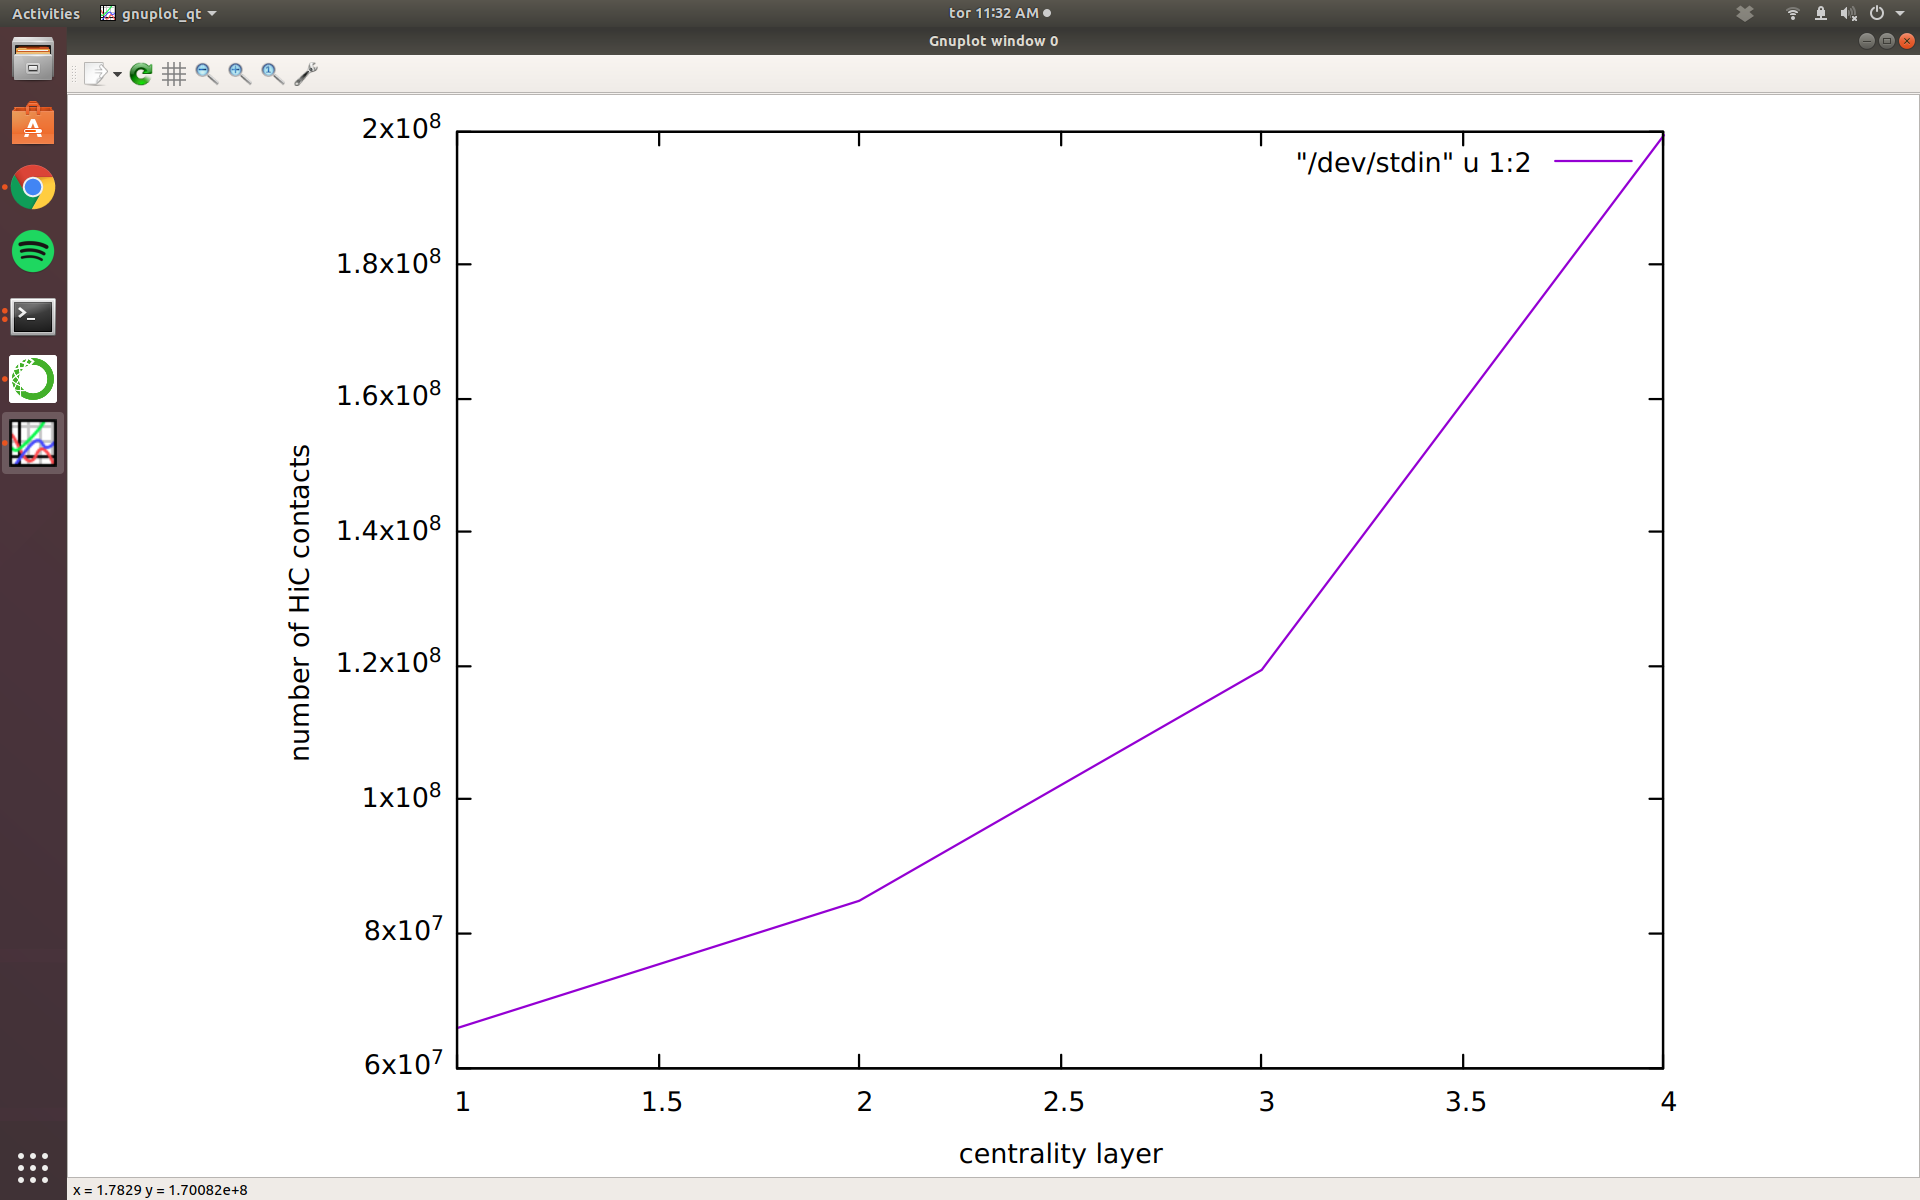

The plot above was obtained with the following code:

In [ ]:
parallel -k "echo {}; cat bc48/*.tsv | awk '\$4=={} && \$6=={}'|tr '.' ','|datamash sum 3" ::: 1 2 3 4|paste - -|gnuplot -p -e 'plot "/dev/stdin" u 1:2 with lines'
            
Numerical results:
#REPLICA  #CENTRALITY  #COUNTS
48        1            65834929
48        2            84880868
48        3           119414773
48        4           199351740
52        1            66320632
52        2            86032195
52        3           128739328
52        4           191708973
58        1            70645484
58        2            84640655
58        3           118256978
58        4           191567698

Considering separately intra and inter-chromosomal contacts:

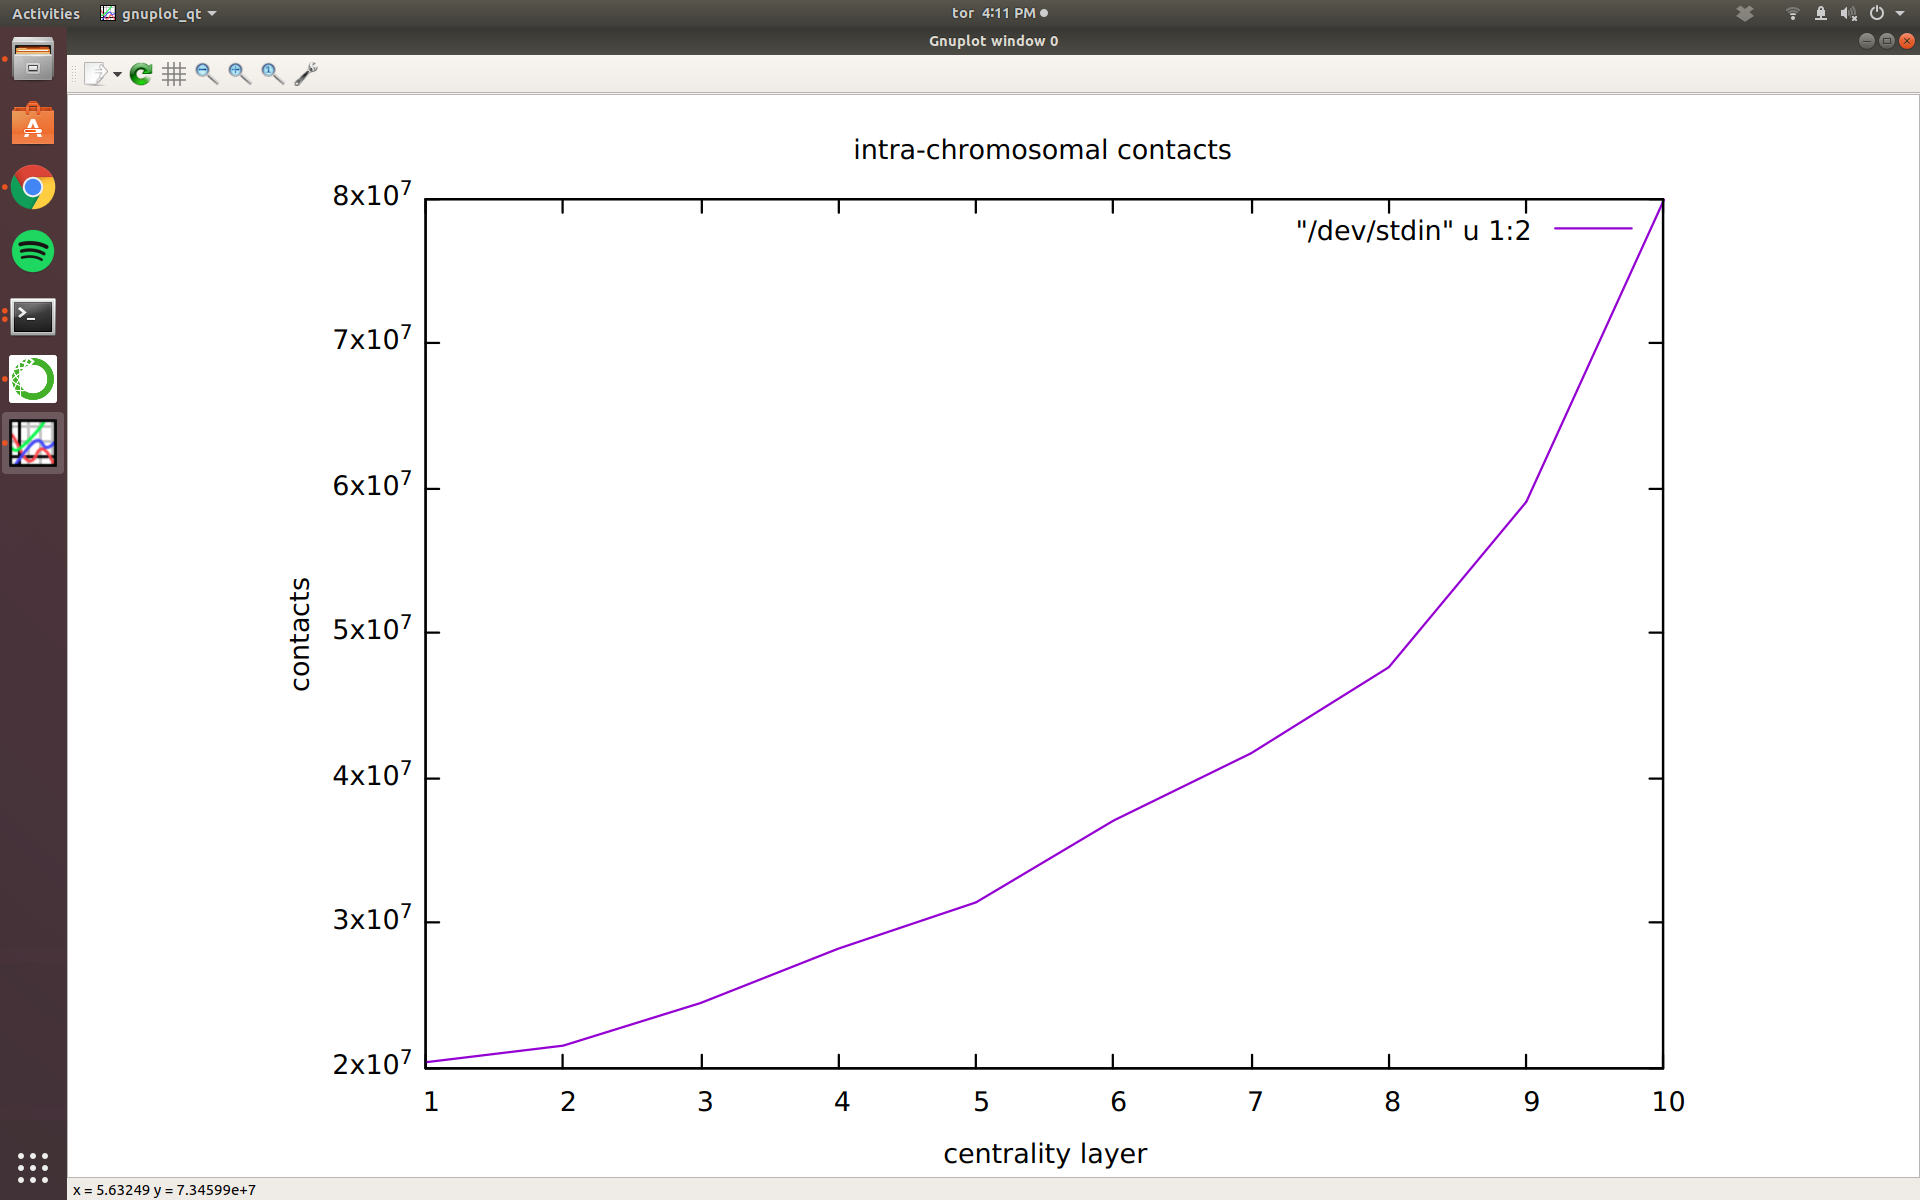

In [ ]:
'''
1	20333753
2	21495215
3	24437244
4	28189696
5	31382918
6	37021301
7	41677685
8	47622744
9	59026734
10	79892794
'''

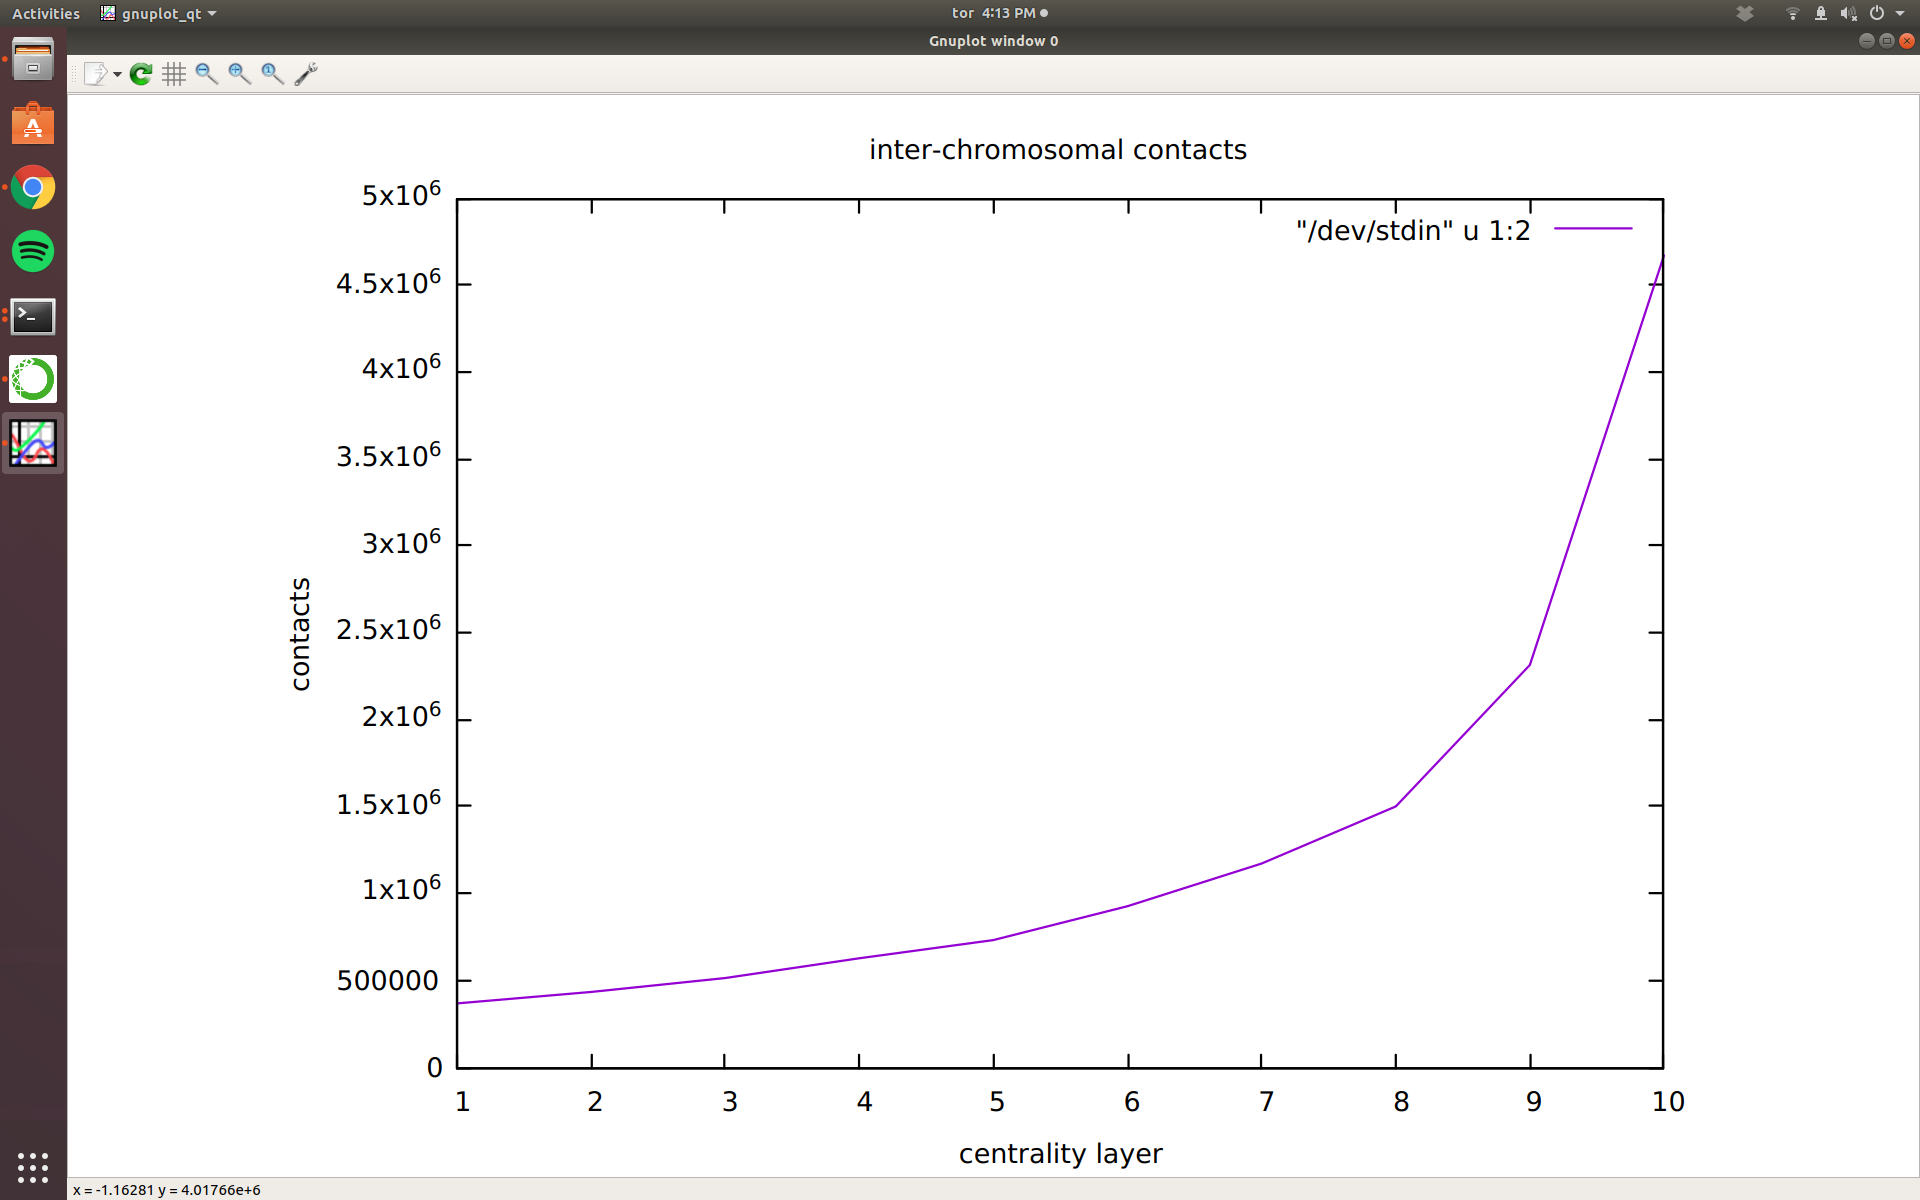

In [ ]:
'''
1	366955
2	432709
3	513148
4	626647
5	731616
6	926380
7	1172477
8	1500784
9	2314462
10	4670611
'''

We can also look at how the mean number of contacts changes with the distance between centrality layers (0,1,2,3):

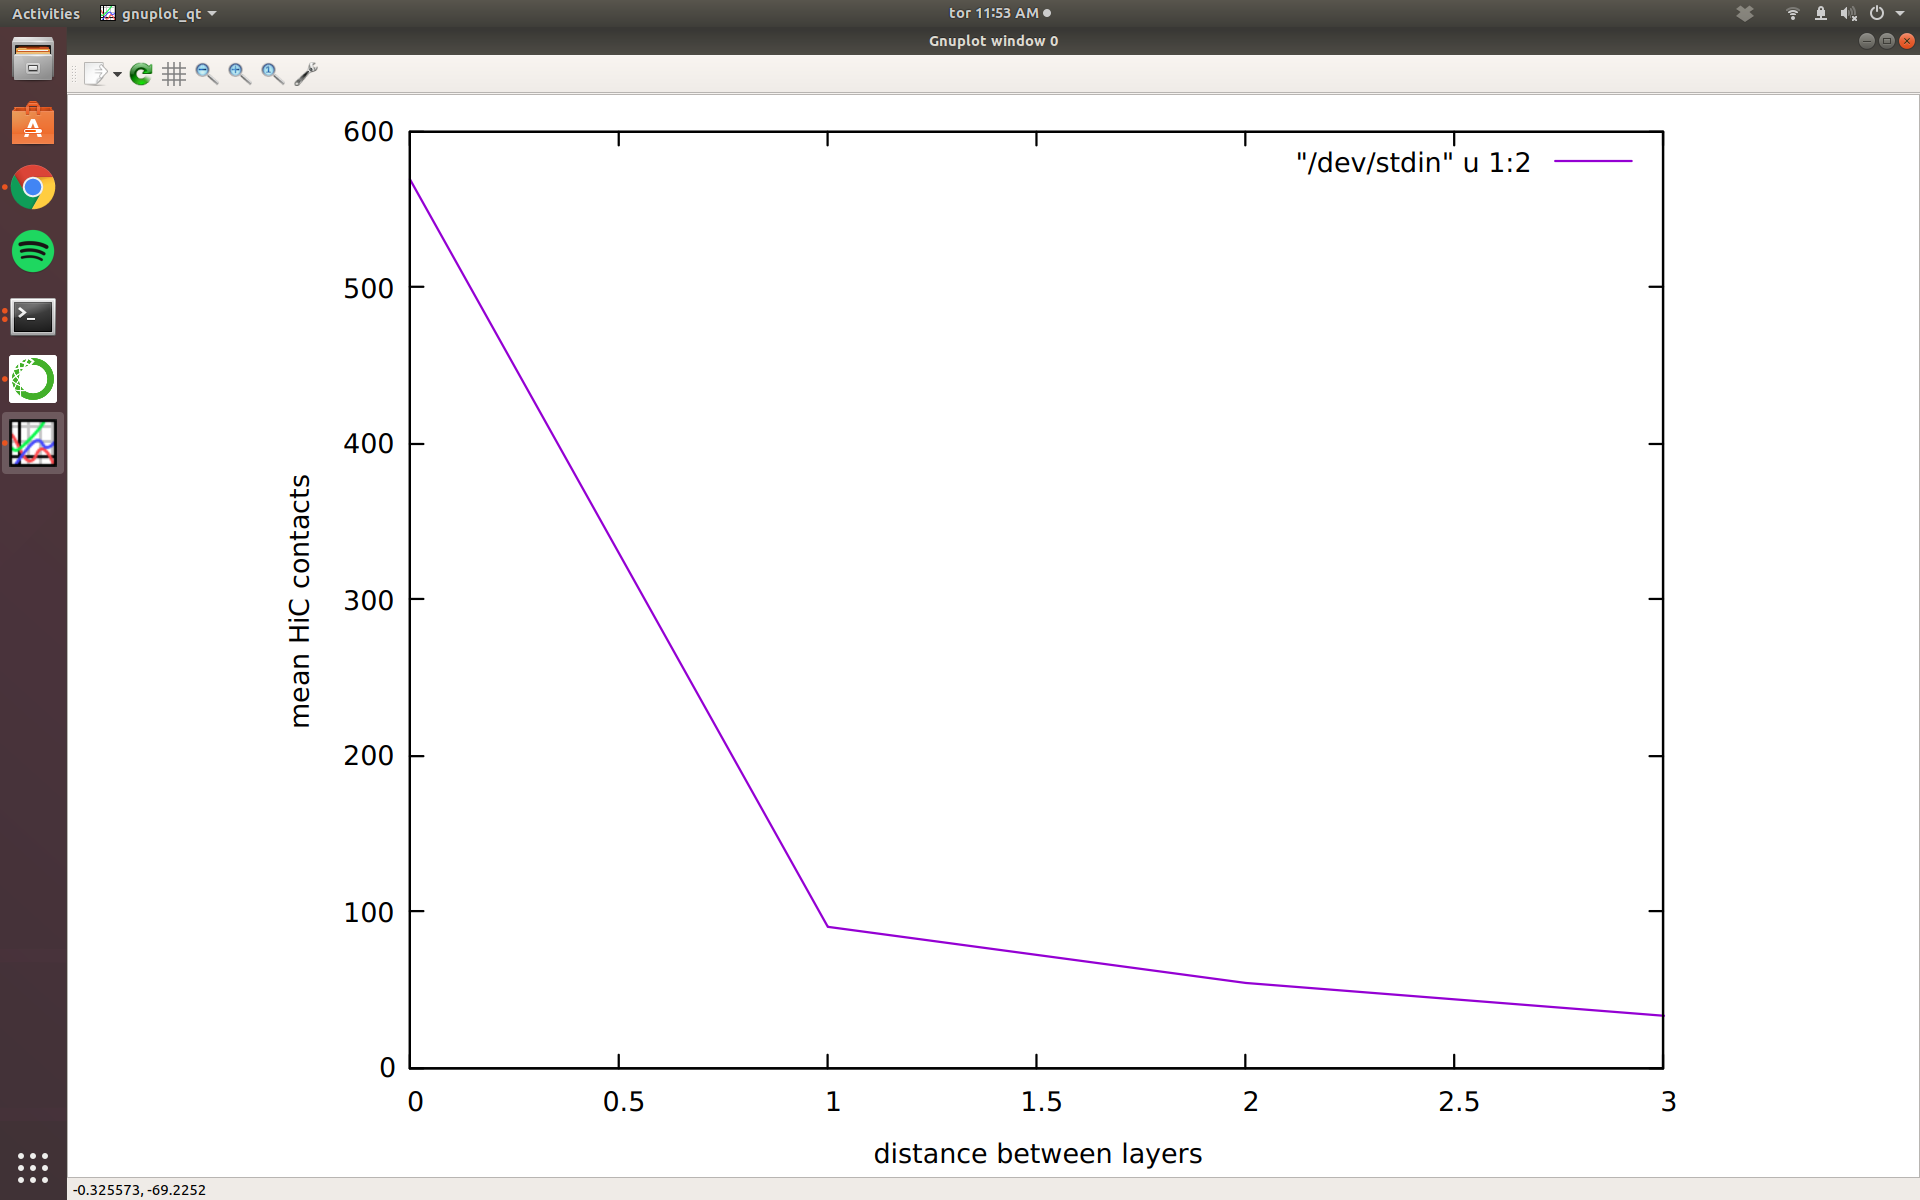

In [ ]:
'''
BC48
0	569
1	90
2	54
3	33
'''

Considering deciles instead of quartiles and splitting the inter from the intra-chromosomal contacts:

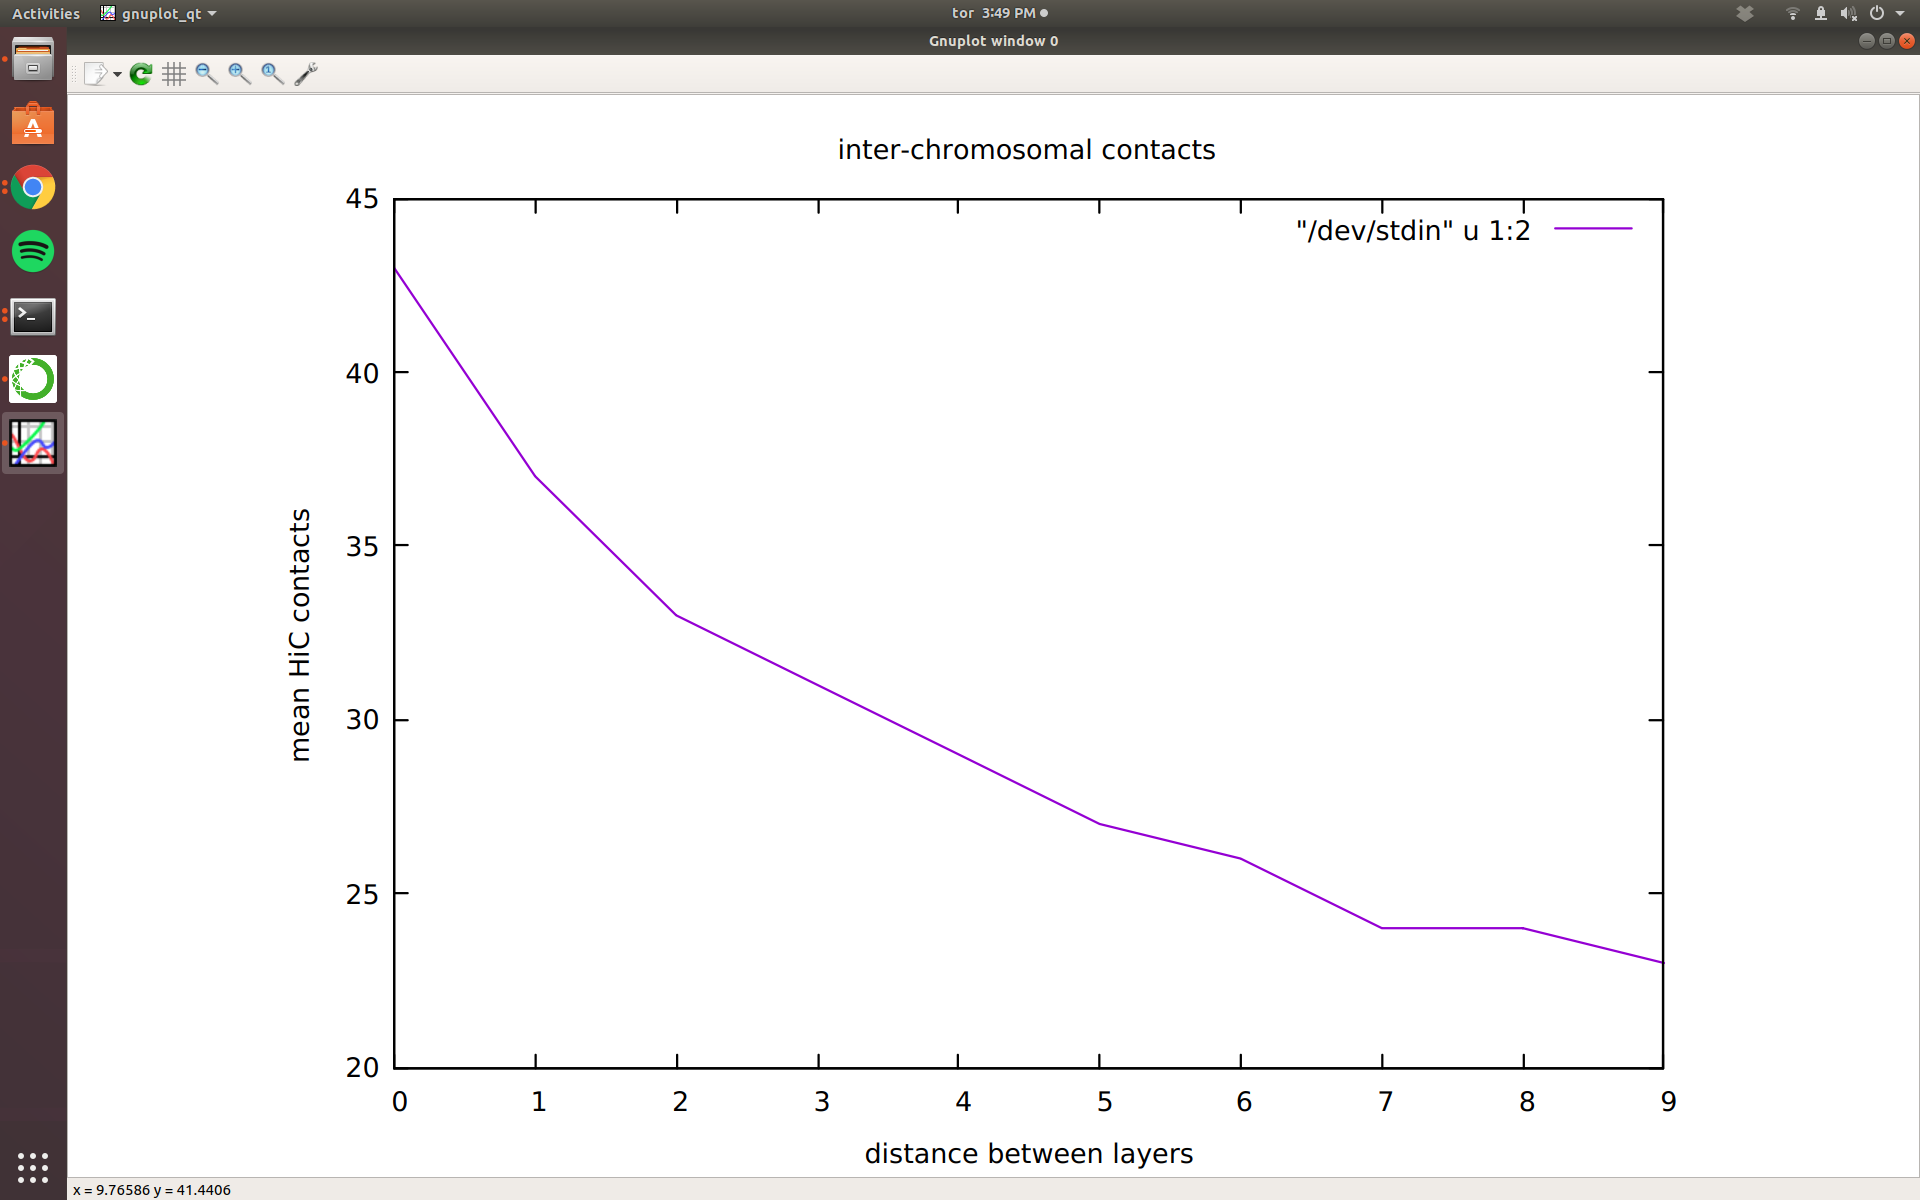

In [ ]:
'''
0	15177
1	1552
2	1128
3	819
4	658
5	480
6	377
7	291
8	205
9	126
'''

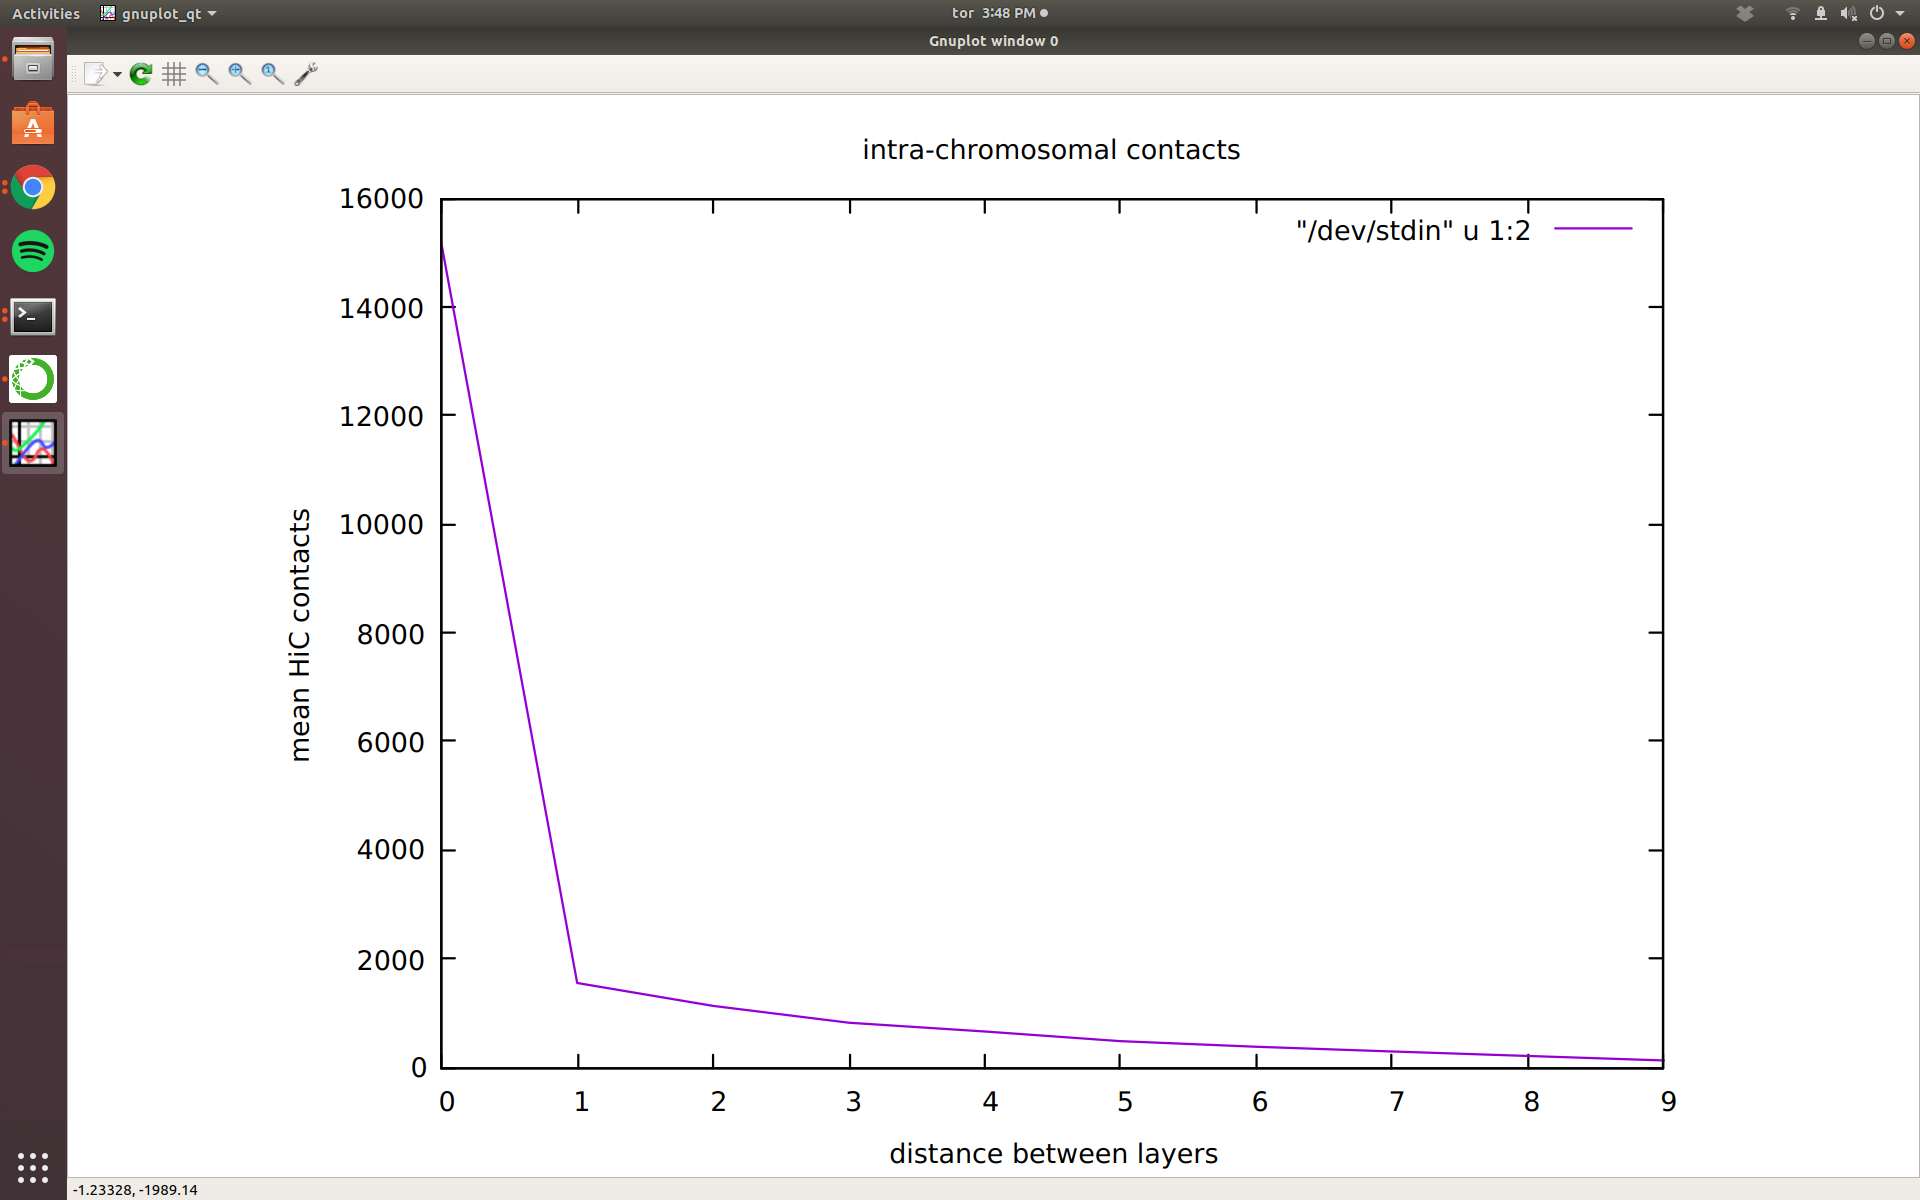

In [ ]:
'''
0	43
1	37
2	33
3	31
4	29
5	27
6	26
7	24
8	24
9	23
'''

and their ratio:

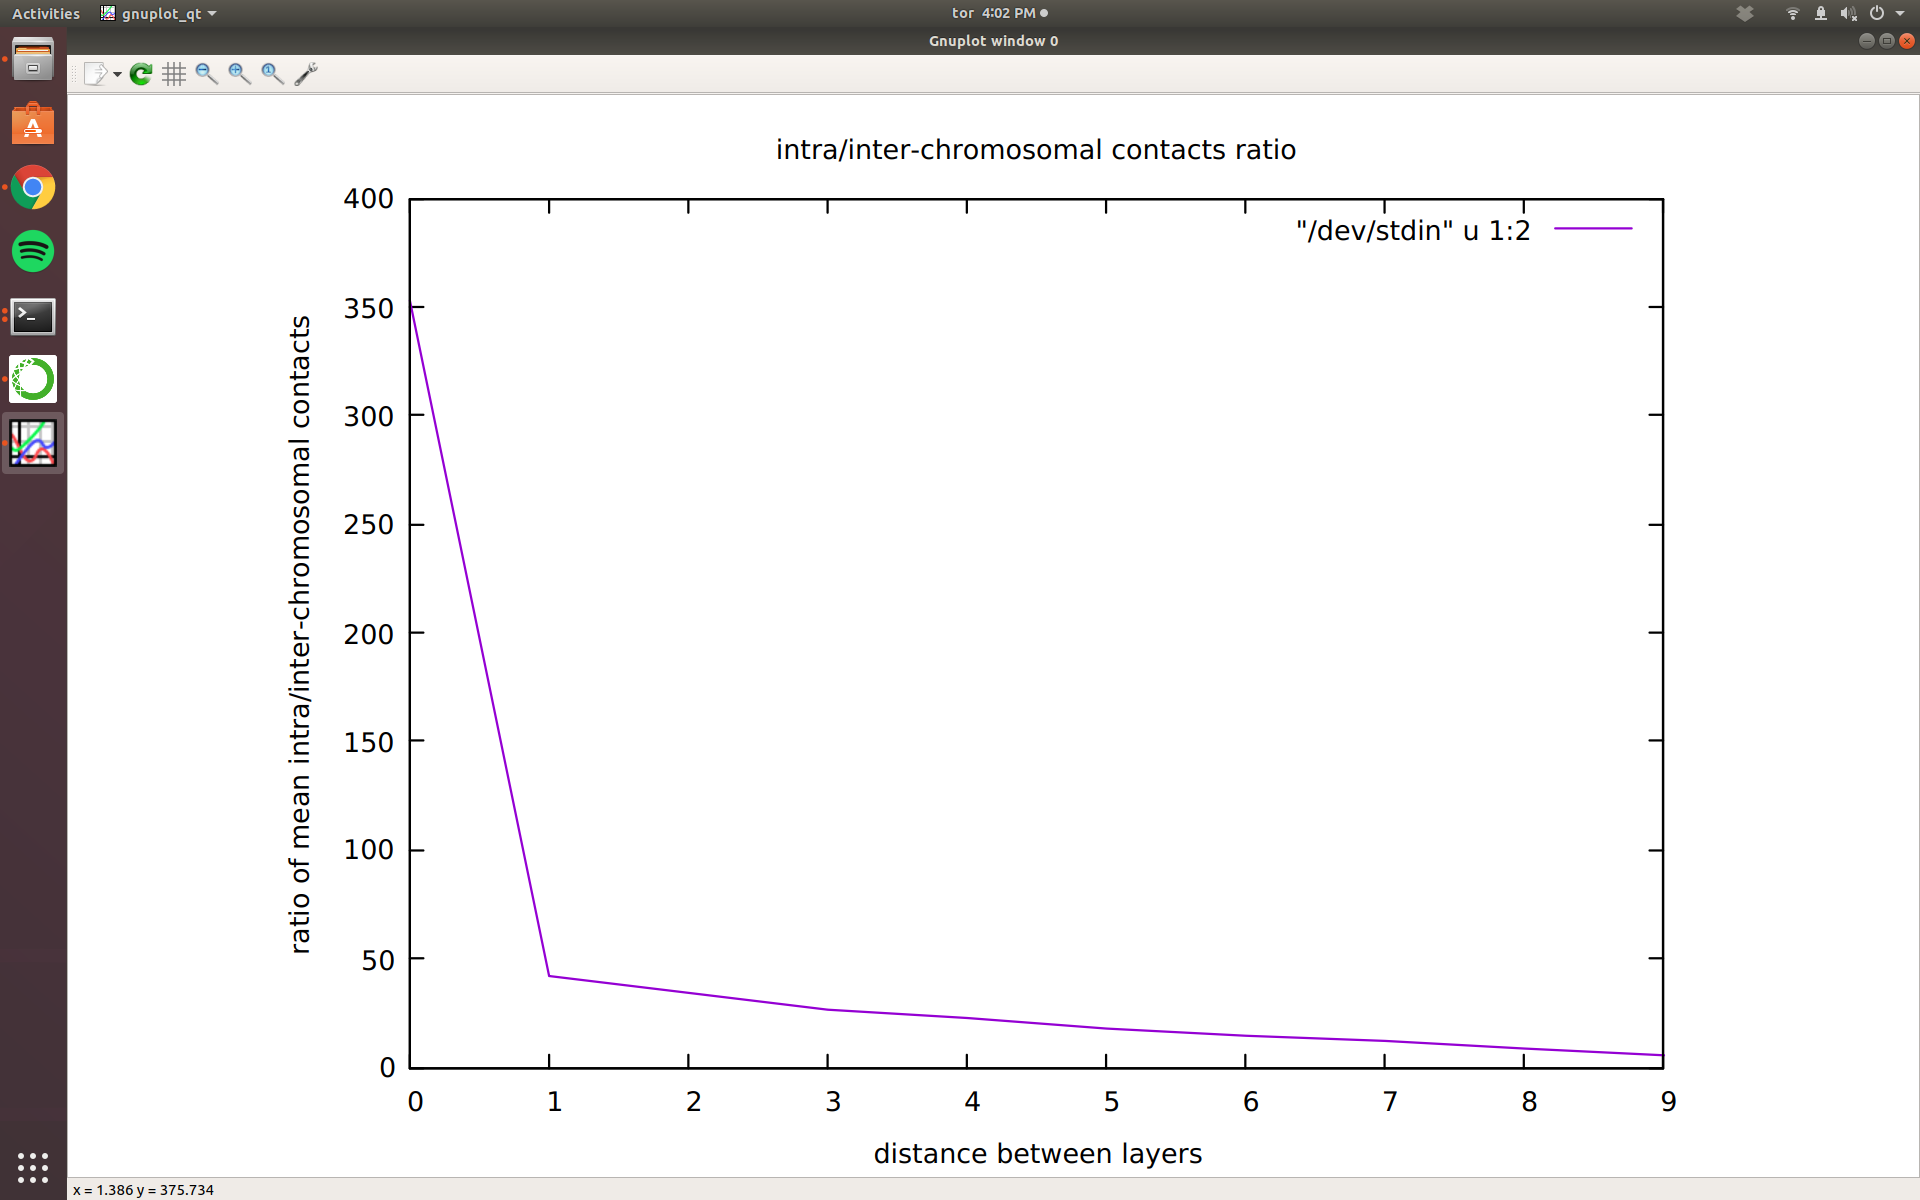

While these are the values of the inter\intra-chromosomal HiC contacts as a function of the centrality layers for BC48-52-58:

In [ ]:
'''
#layer	intra		inter		ratio
1       63.232.511	2.602.418	24
2       80.828.838	4.052.030	19
3       112.561.272	6.853.501	16
4       181.233.791	18.117.949	10

1       63.723.249	2.597.383	24
2       81.895.982	4.136.213	19
3       121.097.189	7.642.139	15
4       175.644.411	16.064.562	10

1       67.744.736	2.900.748	23
2       80.652.617	3.988.038	20
3       111.289.656	6.967.322	15
4       174.796.437	16.771.261	10
'''

Conclusions: 

* interactions on average increase monotonically from periphery to center
* interactions on average decrease monotonically with radial distance
* the ration between intra- and inter-chromosomal interactions decrease monotonically from periphery to center

All of the above conclusions are consistent with entropic and functional arguments: the center is a region where the genome is more self-interacting and where the typical distance between chromosome regions is smaller than in the periphery, reducing the ratio of intra VS inter-chromosomal contacts, with respect to periphery. 



# Mutual information

Mutual information is a measure of dependence between two random variables: how much information you gain about one variable by knowing the other. If $Pr(i)$ and $Pr(j)$ are the probability distributions of the random variables and if $Pr(i,j)$ is the joint distribution, the mutual information is defined as: $$\sum_{i,j} Pr(i,j)\log \frac{Pr(i,j)}{Pr(i)Pr(j)}.$$ If $Pr(i,j)=Pr(i)Pr(j)$ (total independence) then the mutual information would be 0. 

Properly normalized HiC data give us $Pr(i,j)$, while properly normalized GPseq data give us the individual $Pr(i)^{GPseq}$, but we can also define individual $Pr(i)$ from HiC data: $Pr(i)^{HiC}=\sum_j Pr(i,j)$.

Considering $Pr(i,j)$ and $Pr(i)^{HiC}$ we can look at how the mutual information changes, depending on the centrality layer, from periphery to center (for chr1 and chr2):

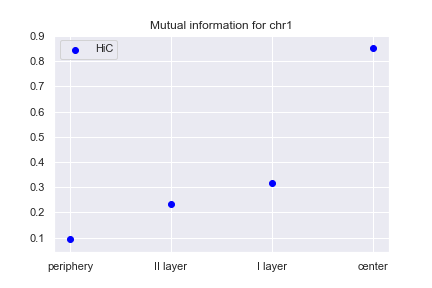

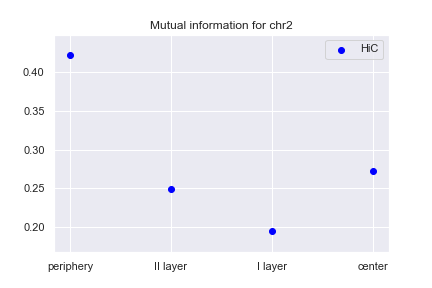

We can also, inside each layer, evaluate how different GPseq time-of-digestions affect the mutual information (using $Pr(i)^{GPseq}$ and considering the same chromosomes):

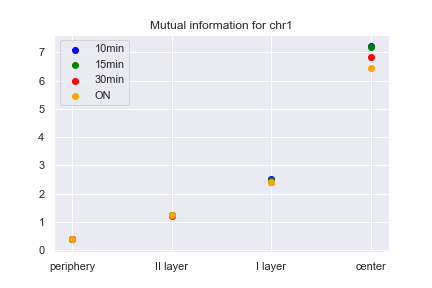

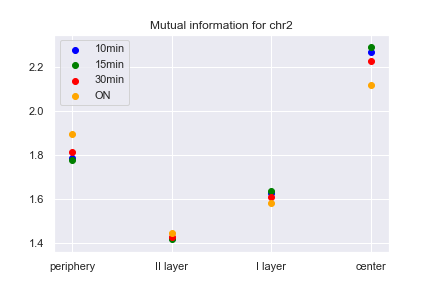

The patterns shown for these two chromosomes is typical: 
* layers of stronger or weaker correlations are chromosome dependent 
* for all chromosomes central layers show stronger correlations for pairs that can be detected with shorter times of digestion 
* viceversa peripheral layers show stronger correlations for pairs that can be detected with longer times of digestion.

An approximate way of phrasing this is: the border of a chromosome (the part easily accessible by the enzyme) is more correlated at the center, while at the periphery the part of the chromosome which is more correlated is in the bulk (where the enzyme needs more time to penetrate).

# Genome-wide mutual information

The following figure shows the behavior of the mutual information genome-wide:
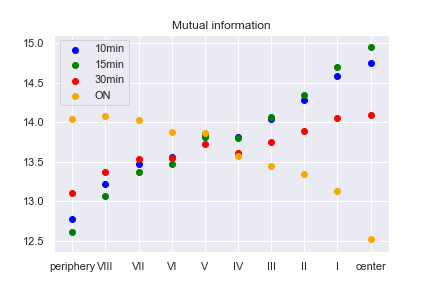

Given the definition of the mutual information ($Pr(i,j)\log \frac{Pr(i,j)}{Pr(i)Pr(j)}$) the plot is consistent with the approximate qualitative interpretation of GPseq that central locations are those with small probabilities of being cut by the enzyme at short time of digestions (small denominator in the mutual information formula). This probability increases with digestion time and might explain the trend in the mutual information curve. 